In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

In [9]:
#df = pd.read_csv('/kaggle/input/color-names/color_names.csv')
#No need to read csv file because we have to predict it on basis of image we get not the color code

In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [81]:
# Directory to save augmented images
save_dir = 'augmented_images'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


In [85]:
df = '/kaggle/input/color-dataset-for-color-recognition/training_dataset'

# ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Using Generators

train_generators = datagen.flow_from_directory(
    df,
    target_size= (64, 64),
    batch_size = 32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    df,
    target_size= (64, 64),
    batch_size = 32,
    class_mode = 'categorical',
    subset='validation'
)

Found 200 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [86]:
#Builiding CNNs
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [87]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    validation_data=validation_generator,
    validation_steps=10,
    epochs=25
)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.1497 - loss: 2.2594 - val_accuracy: 0.3600 - val_loss: 1.9976
Epoch 2/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2313 - loss: 2.0352 - val_accuracy: 0.3000 - val_loss: 1.9128
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.3763 - loss: 1.7880 - val_accuracy: 0.5200 - val_loss: 1.4695
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3375 - loss: 1.5777 - val_accuracy: 0.5800 - val_loss: 1.3421
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.4784 - loss: 1.2983 - val_accuracy: 0.6000 - val_loss: 1.1829
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5625 - loss: 1.2725 - val_accuracy: 0.6400 - val_loss: 1.0862
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.5541 - loss: 1.1433 - val_accuracy: 0.6400 - val_loss: 1.0285
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6750 - loss: 0.9374 - val_accuracy: 0.6600 - val_loss: 0.9763
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.6182 - loss: 0.9354 - val_accuracy: 0.7400 - val_loss: 0.8160
Epoch 1

In [89]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=10)
print(f'Validation Accuracy: {accuracy:.2f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9218 - loss: 0.3021 
Validation Accuracy: 0.92


In [90]:
# Save the trained model
model.save('color_classification_model.h5')

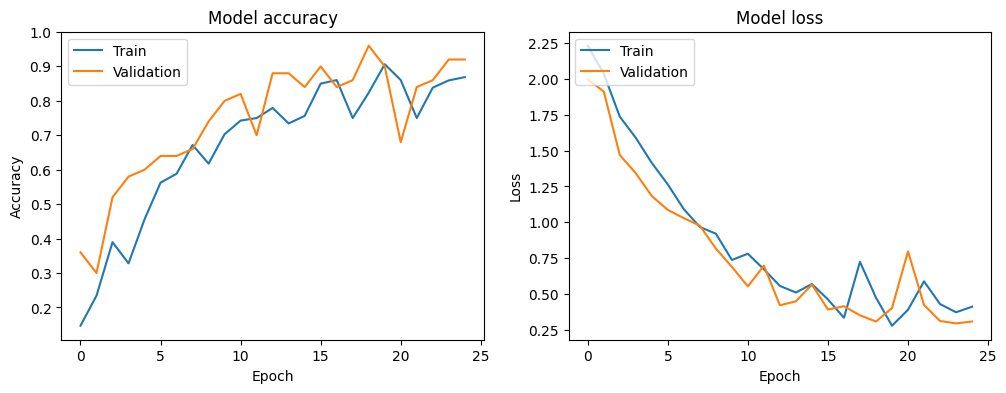

In [91]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [92]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess an image
img_path = '/kaggle/input/testingb/download.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [93]:
# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
predicted_color = class_labels[predicted_class]

print(f'Predicted Color: {predicted_color}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Color: blue
